## Coupling an adatom to a graphene nanoflake

This example demonstrates an advanced simulation. We will couple an adatom and a nanoflake. Once this is accomplished, alla analyses of the previous tutorials can be applied to the hybrid systems, i.e. Rabi oscillations, absorptions etc without modification.

### Set up the Stack

The setup is analogous to the previous tutorials. We can add the isolated systems (flake, adatom) to the StackBuilder instance.

In [2]:
import granad
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

sb = granad.StackBuilder()

# geometry
triangle = granad.Triangle(7.4) 
graphene = granad.Lattice(
    shape=triangle,
    lattice_type=granad.LatticeType.HONEYCOMB,
    lattice_edge=granad.LatticeEdge.ARMCHAIR,
    lattice_constant=2.46,
)
sb.add("pz", graphene)

# couplings
hopping_graphene = granad.LatticeCoupling(
    orbital_id1="pz", orbital_id2="pz", lattice=graphene, couplings=[0, -2.66] # list of hopping amplitudes like [onsite, nn, ...]
)
sb.set_hopping(hopping_graphene)
coulomb_graphene = granad.LatticeCoupling(
    orbital_id1="pz",
    orbital_id2="pz",
    lattice=graphene,
    couplings=[16.522, 8.64, 5.333],
    coupling_function=lambda d: 14.399 / d + 0j,
)
sb.set_coulomb(coulomb_graphene)


# add adatom in top position over the 0-th atom in benzene ring
pos = sb.get_positions()
top_position = pos[0] + jnp.array([0.0, 0.0, 1.0])
spot = granad.Spot(position=top_position)
sb.add("A", spot)
sb.add("B", spot, occupation = 0)

# onsite hopping
sb.set_hopping(granad.SpotCoupling(orbital_id1="A", orbital_id2="A", coupling=0))
sb.set_hopping(granad.SpotCoupling(orbital_id1="A", orbital_id2="B", coupling=1))
sb.set_hopping(granad.SpotCoupling(orbital_id1="B", orbital_id2="B", coupling=2))

# onsite coulomb
sb.set_coulomb(granad.SpotCoupling(orbital_id1="A", orbital_id2="A", coupling=1))
sb.set_coulomb(granad.SpotCoupling(orbital_id1="A", orbital_id2="B", coupling=1))
sb.set_coulomb(granad.SpotCoupling(orbital_id1="B", orbital_id2="B", coupling=1))

### Combine the systems

We now couple the two systems

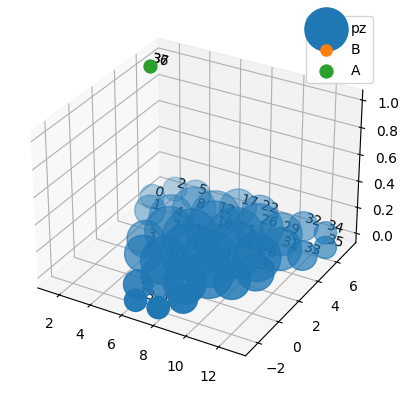

In [7]:
for orb in ["A", "B"]:
    lattice_spot_hopping = granad.LatticeSpotCoupling(
        lattice_id="pz", spot_id=orb, couplings=[1, 0.5]
    )
    sb.set_hopping(lattice_spot_hopping)
    lattice_spot_coulomb = granad.LatticeSpotCoupling(
        lattice_id="pz",
    spot_id=orb,
    couplings=[2],
    coupling_function=lambda d: 1 / d + 0j,
    )
    sb.set_coulomb(lattice_spot_coulomb)

stack = sb.get_stack()
granad.show_eigenstate3D(stack)